In [18]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variables de entrada
vistas = ctrl.Antecedent(np.arange(0,101,1),'Numero de vistas en millones [x10^6]')
tiempo = ctrl.Antecedent(np.arange(0,13,1),'tiempo')

# Variable de Salida
probabilidad =ctrl.Consequent(np.arange(0,1.01,0.001),"probabilidad")

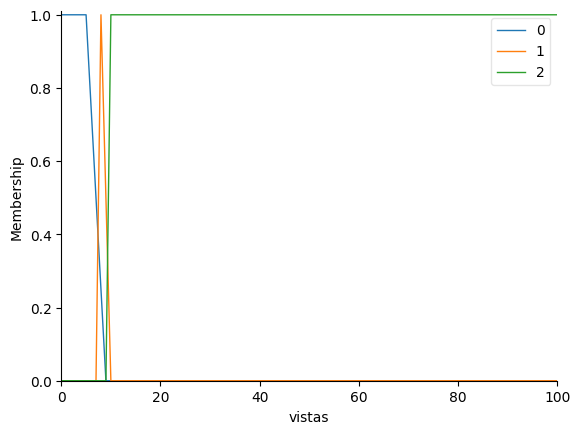

In [31]:
## Funciones de membresia

# vistas
vistas['0']=fuzz.trapmf(vistas.universe,[0,0,5,9])
vistas['1']=fuzz.trimf(vistas.universe,[7,8,10])
vistas['2']=fuzz.trapmf(vistas.universe,[9,10,100,100])

vistas.view()

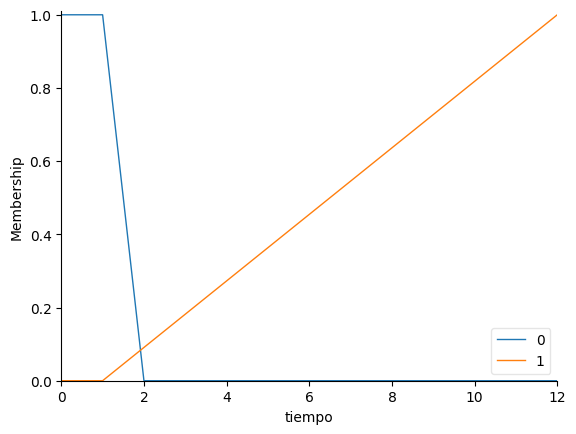

In [20]:
# tiempo
tiempo['0']=fuzz.trapmf(tiempo.universe,[0,0,1,2])
tiempo['1']=fuzz.trimf(tiempo.universe,[1,12,112])

tiempo.view()

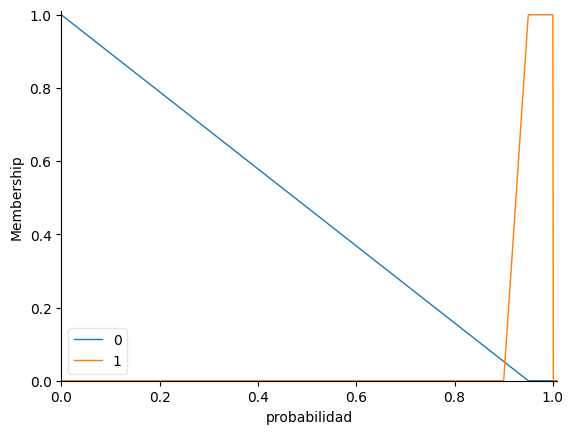

In [32]:
# probabilidad
probabilidad['0']=fuzz.trimf(probabilidad.universe,[0,0,0.95])
probabilidad['1']=fuzz.trapmf(probabilidad.universe,[0.90,0.95,1,1])

probabilidad.view()

In [33]:
# Reglas difusas
regla1 = ctrl.Rule(vistas['0'] & tiempo['0'],probabilidad['0'])
regla2 = ctrl.Rule(vistas['1'] & tiempo['0'],probabilidad['1'])
regla3 = ctrl.Rule(vistas['2'] & tiempo['0'],probabilidad['1'])
regla4 = ctrl.Rule(vistas['0'] & tiempo['1'],probabilidad['0'])
regla5 = ctrl.Rule(vistas['1'] & tiempo['1'],probabilidad['0'])
regla6 = ctrl.Rule(vistas['2'] & tiempo['1'],probabilidad['1'])

# sistema difuso

sistema_control = ctrl.ControlSystem(
    [
        regla1,
        regla2,
        regla3,
        regla4,
        regla5,
        regla6
    ]
)

controlador=ctrl.ControlSystemSimulation(sistema_control)


In [40]:
# Implementacion del controlador

#entradas
controlador.input['vistas']=6
controlador.input['tiempo']=4
controlador.compute()
# salida
salida = controlador.output['probabilidad']
print(f'la probabilidad de que la pelicula sea un exito es de {salida}')

la probabilidad de que la pelicula sea un exito es de 0.4136363636363593
